# Импорт

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.gridspec as gridspec
import joblib
# omsky_gamedev

# Загрузка датасета для регрессии.

In [7]:
models = pd.read_csv('../Data/energy_task_moded.csv')
models

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,month,year,time
0,60.0,30.0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,6.60,733.5,92.000000,7.000000,63.000000,5.3,11.0,1.0,2016.0,1020.0
1,60.0,30.0,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.48,733.6,92.000000,6.666667,59.166667,5.2,11.0,1.0,2016.0,1030.0
2,50.0,30.0,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.37,733.7,92.000000,6.333333,55.333333,5.1,11.0,1.0,2016.0,1040.0
3,50.0,40.0,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.25,733.8,92.000000,6.000000,51.500000,5.0,11.0,1.0,2016.0,1050.0
4,60.0,40.0,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,6.13,733.9,92.000000,5.666667,47.666667,4.9,11.0,1.0,2016.0,1060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100.0,0.0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,22.70,755.2,55.666667,3.333333,23.666667,13.3,27.0,5.0,2016.0,1040.0
19731,90.0,0.0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,22.60,755.2,56.000000,3.500000,24.500000,13.3,27.0,5.0,2016.0,1050.0
19732,270.0,10.0,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,22.50,755.2,56.333333,3.666667,25.333333,13.3,27.0,5.0,2016.0,1060.0
19733,420.0,10.0,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,22.30,755.2,56.666667,3.833333,26.166667,13.2,27.0,5.0,2016.0,1070.0


In [8]:
X = models.drop('Appliances', axis=1)
Y = models['Appliances']
X

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,day,month,year,time
0,30.0,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,6.60,733.5,92.000000,7.000000,63.000000,5.3,11.0,1.0,2016.0,1020.0
1,30.0,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,6.48,733.6,92.000000,6.666667,59.166667,5.2,11.0,1.0,2016.0,1030.0
2,30.0,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,6.37,733.7,92.000000,6.333333,55.333333,5.1,11.0,1.0,2016.0,1040.0
3,40.0,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,6.25,733.8,92.000000,6.000000,51.500000,5.0,11.0,1.0,2016.0,1050.0
4,40.0,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,6.13,733.9,92.000000,5.666667,47.666667,4.9,11.0,1.0,2016.0,1060.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0.0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,22.70,755.2,55.666667,3.333333,23.666667,13.3,27.0,5.0,2016.0,1040.0
19731,0.0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,22.60,755.2,56.000000,3.500000,24.500000,13.3,27.0,5.0,2016.0,1050.0
19732,10.0,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,22.50,755.2,56.333333,3.666667,25.333333,13.3,27.0,5.0,2016.0,1060.0
19733,10.0,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,22.30,755.2,56.666667,3.833333,26.166667,13.2,27.0,5.0,2016.0,1070.0


# Загрузка моделей

In [9]:
power = 2

In [10]:
line_regression_classic = joblib.load('../Pipelines/Laba1/LineRegressions/LineRegressionClassicModel.sav')
line_regression_ridge = joblib.load('../Pipelines/Laba1/LineRegressions/LineRegressionRidgeModel.sav')
line_regression_lasso = joblib.load('../Pipelines/Laba1/LineRegressions/LineRegressionLassoModel.sav')
polynomial_regression_classic = joblib.load('../Pipelines/Laba1/PolynomialRegressions/PolynomialRegressionClassicModel.sav')
polynomial_regression_ridge = joblib.load('../Pipelines/Laba1/PolynomialRegressions/PolynomialRegressionRidgeModel.sav')
polynomial_regression_lasso = joblib.load('../Pipelines/Laba1/PolynomialRegressions/PolynomialRegressionLassoModel.sav')


# Graphics

Text(0.5, 1.0, 'polynomial_regression + L2')

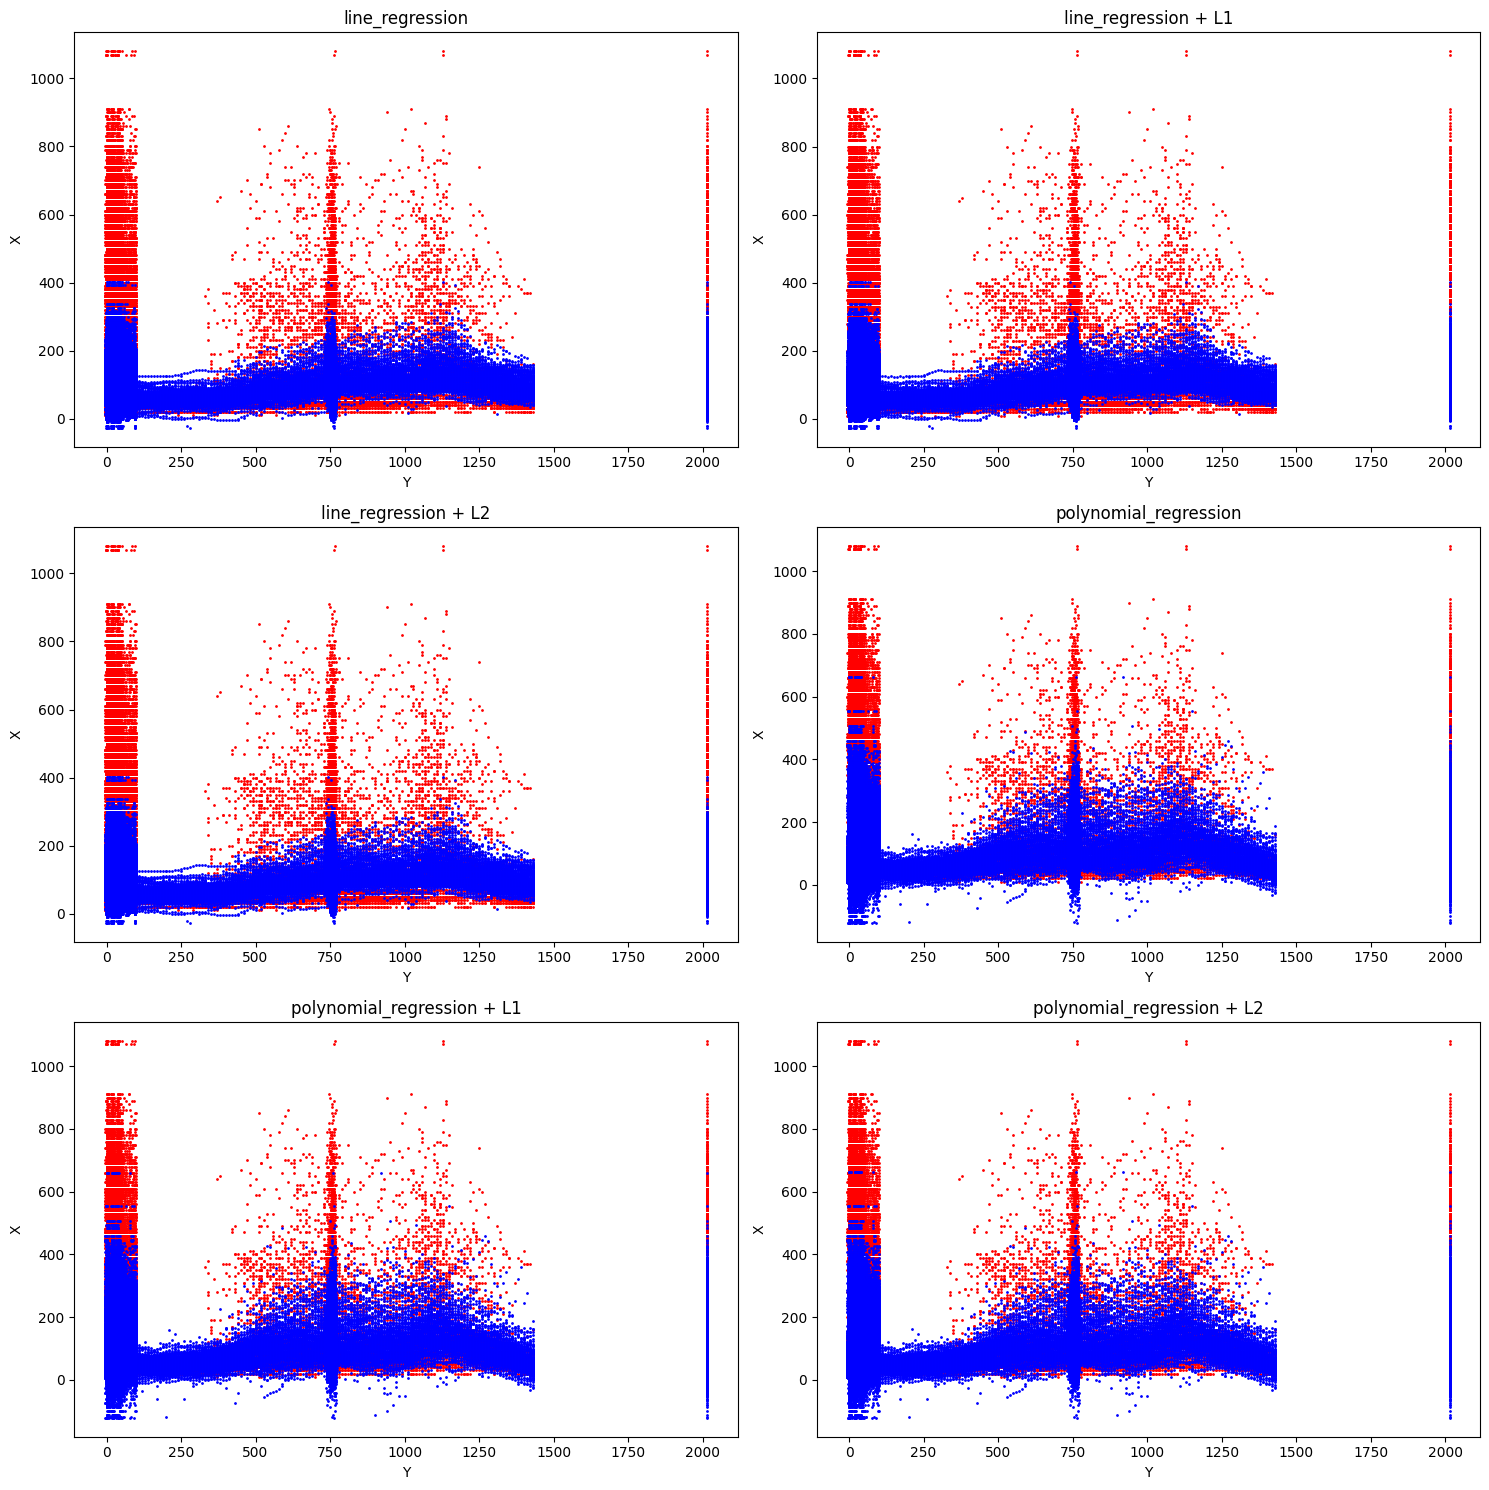

In [11]:
fig = plt.figure(tight_layout=True)
fig.set_figheight(15)
fig.set_figwidth(15)
gs = gridspec.GridSpec(3, 2)
ax = fig.add_subplot(gs[0, 0])
ax.plot(X, Y, 'ro', markersize=1)
ax.plot(X, line_regression_classic.predict(X), 'bo', markersize=1)
ax.set_ylabel('X')
ax.set_xlabel('Y')
ax.set_title('line_regression')
# --------------------------------
ax = fig.add_subplot(gs[0, 1])
ax.plot(X, Y, 'ro', markersize=1)
ax.plot(X, line_regression_ridge.predict(X), 'bo', markersize=1)
ax.set_ylabel('X')
ax.set_xlabel('Y')
ax.set_title('line_regression + L1')
# --------------------------------
ax = fig.add_subplot(gs[1, 0])
ax.plot(X, Y, 'ro', markersize=1)
ax.plot(X, line_regression_lasso.predict(X), 'bo', markersize=1)
ax.set_ylabel('X')
ax.set_xlabel('Y')
ax.set_title('line_regression + L2')
# --------------------------------
ax = fig.add_subplot(gs[1, 1])
ax.plot(X, Y, 'ro', markersize=1)
ax.plot(X, polynomial_regression_classic.predict(
    PolynomialFeatures(power).fit_transform(X)), 'bo', markersize=1)
ax.set_ylabel('X')
ax.set_xlabel('Y')
ax.set_title('polynomial_regression')

# --------------------------------
ax = fig.add_subplot(gs[2, 0])
ax.plot(X, Y, 'ro', markersize=1)
ax.plot(X, polynomial_regression_ridge.predict(
    PolynomialFeatures(power).fit_transform(X)), 'bo', markersize=1)
ax.set_ylabel('X')
ax.set_xlabel('Y')
ax.set_title('polynomial_regression + L1')

# --------------------------------
ax = fig.add_subplot(gs[2, 1])
ax.plot(X, Y, 'ro', markersize=1)
ax.plot(X, polynomial_regression_lasso.predict(
    PolynomialFeatures(power).fit_transform(X)), 'bo', markersize=1)
ax.set_ylabel('X')
ax.set_xlabel('Y')
ax.set_title('polynomial_regression + L2')


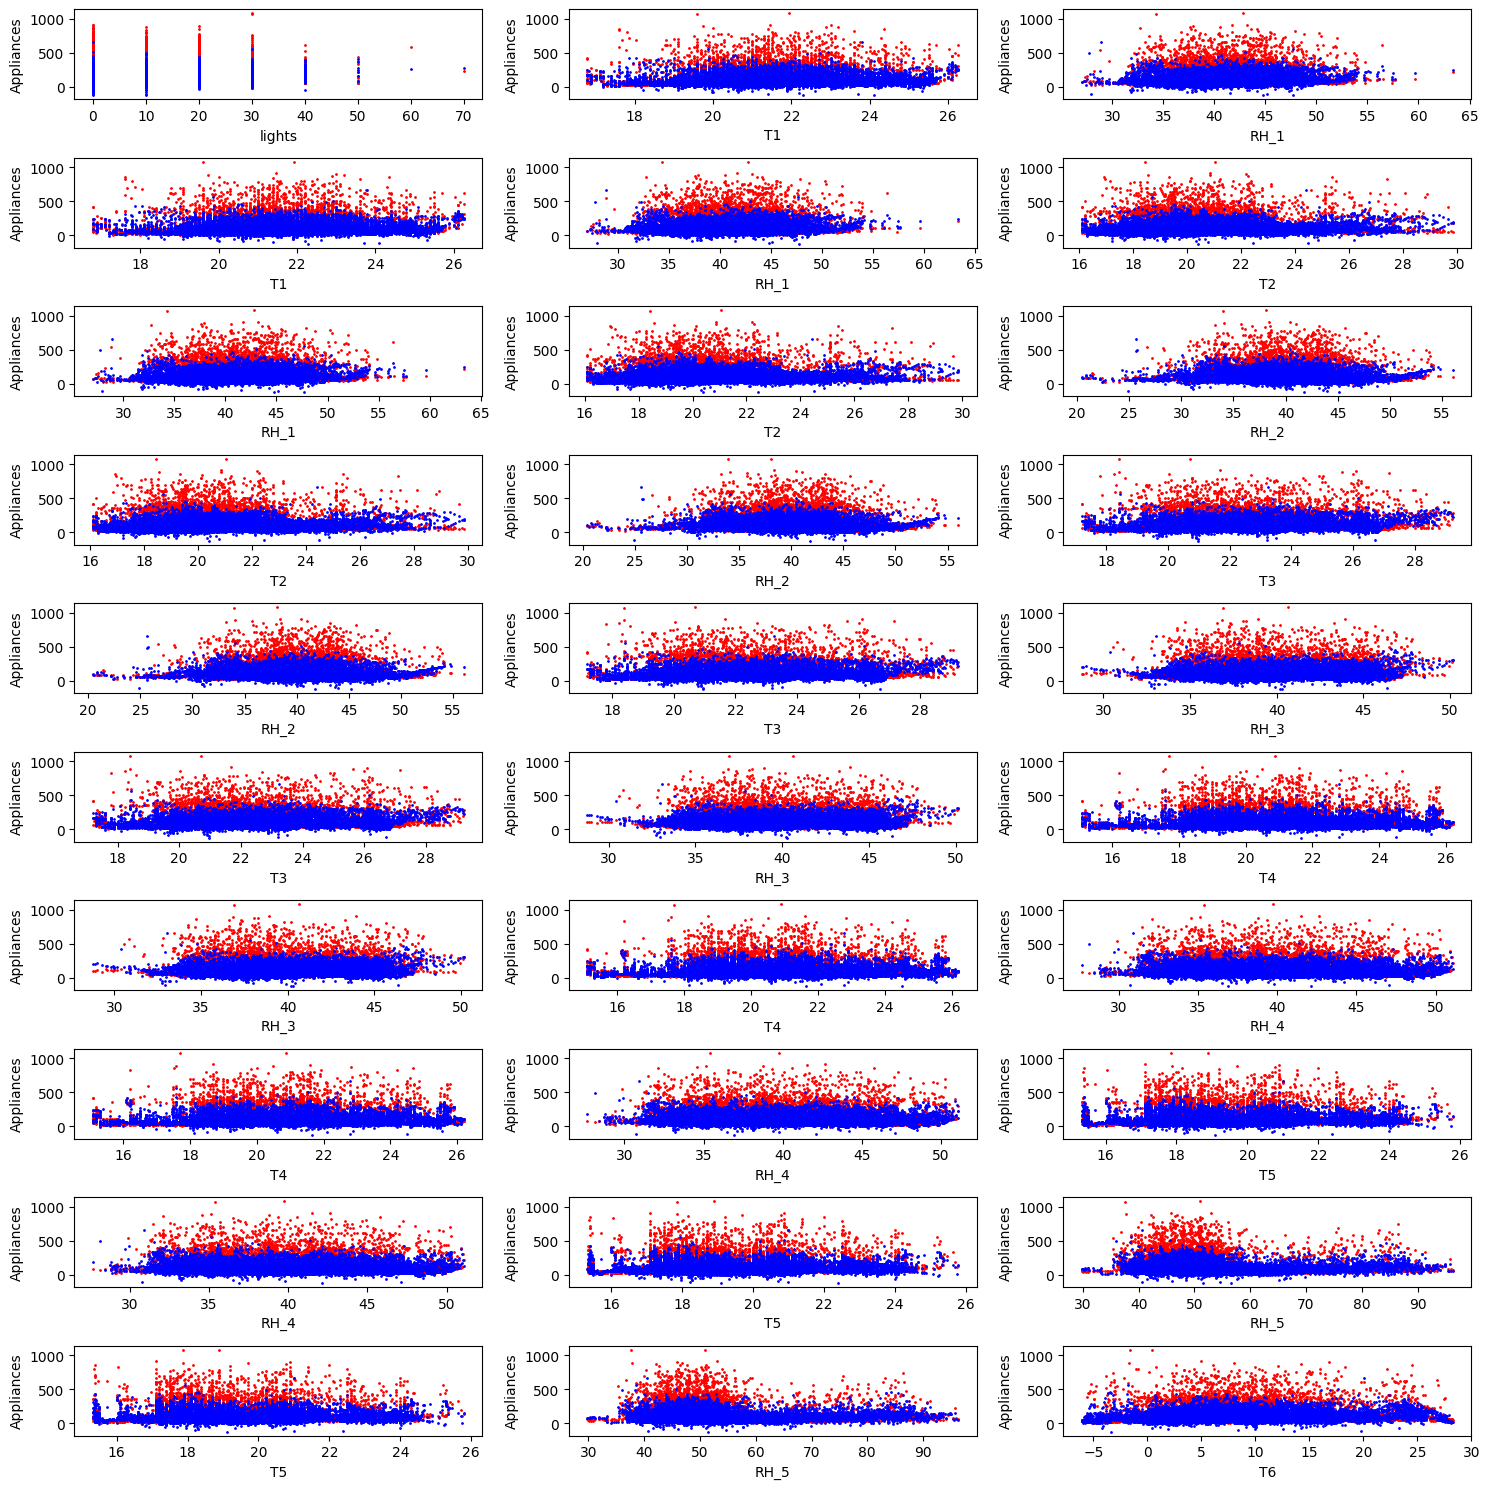

In [20]:
possible_params = models.drop('Appliances', axis=1).columns

fig = plt.figure(tight_layout=True)
fig.set_figheight(15)
fig.set_figwidth(15)
gs = gridspec.GridSpec(10, 3)
for i in range(10):
    for j in range(3):
        ax = fig.add_subplot(gs[i, j])
        label = possible_params[i+j]
        ax.plot(models[label], models['Appliances'], 'ro', markersize=1)

        ax.plot(models[label], polynomial_regression_lasso.predict(
            PolynomialFeatures(power).fit_transform(X)), 'bo', markersize=1)
        ax.set_ylabel('Appliances')
        ax.set_xlabel(label)


# Errors

## Errors for classic line regression

In [13]:
y_predicted = line_regression_classic.predict(X)
line_regression_classic_errors = {'MAE': mean_absolute_error(y_predicted, Y),
                                  'RMSE': mean_squared_error(y_predicted, Y),
                                  'MSE': mean_squared_error(y_predicted, Y)**0.5,
                                  'MAPE': mean_absolute_percentage_error(y_predicted, Y),
                                  'R^2': line_regression_classic.score(X, Y)}


## Errors for ridge line regression

In [14]:
y_result = line_regression_ridge.predict(X)
line_regression_ridge_errors = {'MAE': mean_absolute_error(y_predicted, Y),
                                'RMSE': mean_squared_error(y_predicted, Y),
                                'MSE': mean_squared_error(y_predicted, Y)**0.5,
                                'MAPE': mean_absolute_percentage_error(y_predicted, Y),
                                'R^2': line_regression_classic.score(X, Y)}


## Errors for lasso line regression

In [15]:
y_predict = line_regression_lasso.predict(X)
line_regression_lasso_errors = {'MAE': mean_absolute_error(y_predicted, Y),
                                'RMSE': mean_squared_error(y_predicted, Y),
                                'MSE': mean_squared_error(y_predicted, Y)**0.5,
                                'MAPE': mean_absolute_percentage_error(y_predicted, Y),
                                'R^2': line_regression_lasso.score(X, Y)}


## Errors for classic polynomial regression

In [16]:
y_predicted = polynomial_regression_classic.predict(
    PolynomialFeatures(power).fit_transform(X))
polynomial_regression_classic_errors = {'MAE': mean_absolute_error(y_predicted, Y),
                                        'RMSE': mean_squared_error(y_predicted, Y),
                                        'MSE': mean_squared_error(y_predicted, Y)**0.5,
                                        'MAPE': mean_absolute_percentage_error(y_predicted, Y),
                                        'R^2': polynomial_regression_classic.score(PolynomialFeatures(power).fit_transform(X), Y)}


## Errors for ridge polynomial regression

In [17]:
y_predicted = polynomial_regression_lasso.predict(PolynomialFeatures(power).fit_transform(X))
polynomial_regression_lasso_errors = {'MAE': mean_absolute_error(y_predicted, Y),
                                      'RMSE': mean_squared_error(y_predicted, Y),
                                      'MSE': mean_squared_error(y_predicted, Y)**0.5,
                                      'MAPE': mean_absolute_percentage_error(y_predicted, Y),
                                      'R^2': polynomial_regression_lasso.score(PolynomialFeatures(power).fit_transform(X), Y)}


## Errors for lasso polynomial regression

In [18]:
y_predicted = polynomial_regression_ridge.predict(
    PolynomialFeatures(power).fit_transform(X))
polynomial_regression_ridge_errors = {'MAE': mean_absolute_error(y_predicted, Y),
                                      'RMSE': mean_squared_error(y_predicted, Y),
                                      'MSE': mean_squared_error(y_predicted, Y)**0.5,
                                      'MAPE': mean_absolute_percentage_error(y_predicted, Y),
                                      'R^2': polynomial_regression_ridge.score(PolynomialFeatures(power).fit_transform(X), Y)}


## All errors

In [19]:
results_errors = {'line_regression_ridge_errors': line_regression_ridge_errors,
                  'line_regression_classic_errors': line_regression_classic_errors,
                  'line_regression_lasso_errors': line_regression_classic_errors,
                  'polynomial_regression_classic_errors': polynomial_regression_classic_errors,
                  'polynomial_regression_lasso_errors': polynomial_regression_lasso_errors,
                  'polynomial_regression_ridge_errors': polynomial_regression_ridge_errors}
pd.DataFrame(results_errors)


,line_regression_ridge_errors,line_regression_classic_errors,line_regression_lasso_errors,polynomial_regression_classic_errors,polynomial_regression_lasso_errors,polynomial_regression_ridge_errors
MAE,52.606401,52.606401,52.606401,49.181049,49.177479,49.173986
RMSE,8773.631846,8773.631846,8773.631846,7182.412536,7182.046629,7181.695987
MSE,93.667667,93.667667,93.667667,84.749115,84.746956,84.744888
MAPE,0.696084,0.696084,0.696084,0.954366,0.948090,0.946879
R^2,0.165276,0.165276,0.165276,0.316665,0.316700,0.316733
